# Understanding Data

In [41]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.layers import Dense, MaxPooling2D, Flatten, Conv2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array


In [3]:
plt.style.use('dark_background')

In [26]:
cur_dir = os.getcwd()

Htrain_spiral_path = os.path.join(cur_dir, 'data/spiral/train/healthy')
Ptrain_spiral_path = os.path.join(cur_dir, 'data/spiral/train/parkinson')
Htest_spiral_path = os.path.join(cur_dir, 'data/spiral/test/healthy')
Ptest_spiral_path = os.path.join(cur_dir, 'data/spiral/test/parkinson')



# Data visualization

### Healthy spiral

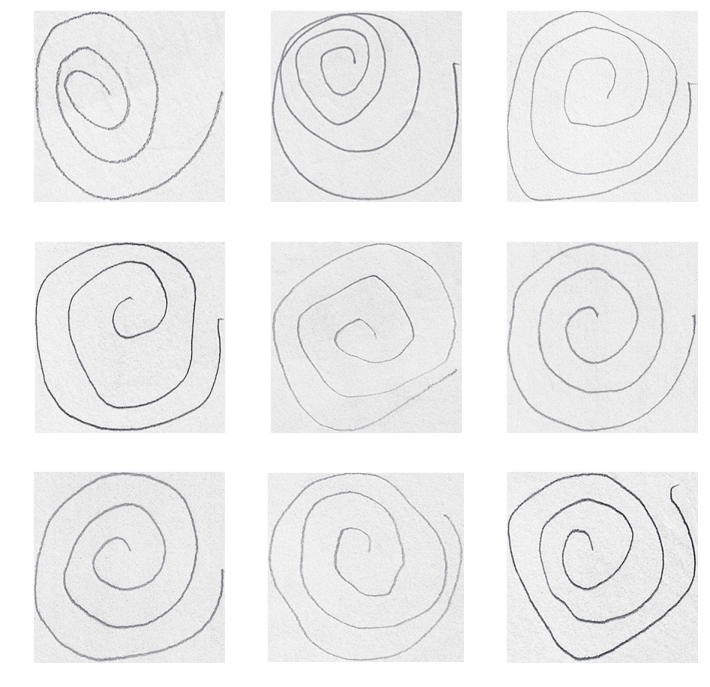

In [22]:
plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    name = os.listdir(Htrain_spiral_path)[i]
    img_path = os.path.join(Htrain_spiral_path, name)
    img = load_img(img_path)
    plt.imshow(img)   
plt.show() 

# Parkinson Spiral

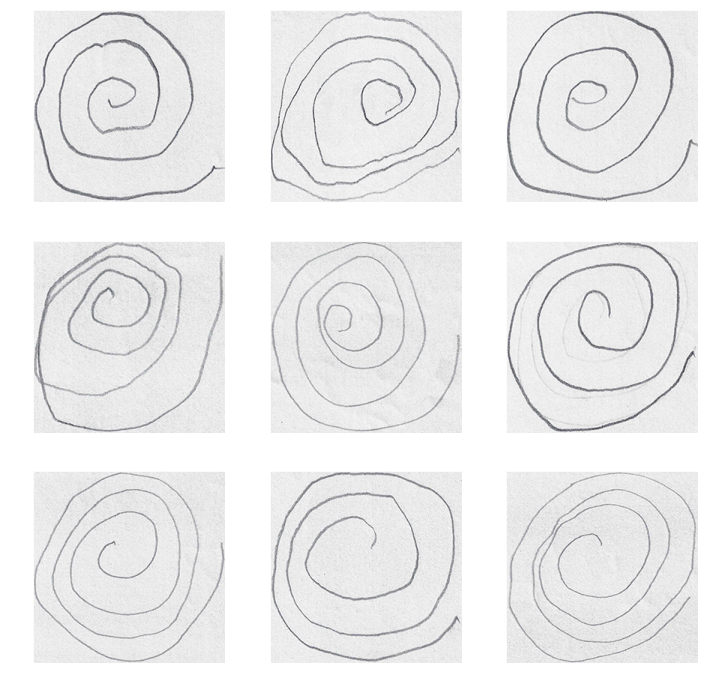

In [23]:
plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    name = os.listdir(Ptrain_spiral_path)[i]
    img_path = os.path.join(Ptrain_spiral_path, name)
    img = load_img(img_path)
    plt.imshow(img)   
plt.show() 

## Image Data Generator

In [37]:
# Here were are rescaling pixels in between 0 to 1

train_datagen = ImageDataGenerator(rescale = 1./255, 
                                  shear_range = 0.2, 
                                  zoom_range = 0.2, 
                                  horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [52]:
train = os.path.join(cur_dir,'data/spiral/train')
test = os.path.join(cur_dir,'data/spiral/test')

train_generator = train_datagen.flow_from_directory(train,
                                                   target_size = (128,128),
                                                   batch_size = 32,
                                                   class_mode = 'binary')

test_generator = test_datagen.flow_from_directory(test,
                                                   target_size = (128,128),
                                                   batch_size = 32,
                                                   class_mode = 'binary')

Found 72 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


## Building Model

In [53]:
model = Sequential()

# Input Layer
model.add(Conv2D(32,(3,3),input_shape=(128, 128, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Hidden Layers
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(activation='relu',units=128))

# Output Layer
model.add(Dense(activation='sigmoid',units=1))

### Compiling the model

In [57]:
early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              cooldown=0,
                              min_lr=0,
                              min_delta=0.0001)

callbacks_list = [early_stopping,reduce_learningrate]

epochs = 5

model.compile(loss='binary_crossentropy', optimizer = Adam(learning_rate=0.001), metrics=['accuracy'])

In [60]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch = 2,
        epochs = 5,
        validation_data = test_generator,
        validation_steps = 1,
        callbacks=callbacks_list)

/var/folders/ts/4y5v3zns7x5c84jf9byws_nc0000gn/T/ipykernel_41831/334332947.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/5
2/2 [==============================] - 0s 207ms/step - loss: 0.7084 - accuracy: 0.5500 - val_loss: 0.6947 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/5
2/2 [==============================] - 1s 283ms/step - loss: 0.7160 - accuracy: 0.4688 - val_loss: 0.7017 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 3/5
2/2 [==============================] - 1s 262ms/step - loss: 0.7002 - accuracy: 0.4844 - val_loss: 0.6935 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 4/5
2/2 [==============================] - 0s 361ms/step - loss: 0.7001 - accuracy: 0.4250 - val_loss: 0.6963 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 5/5
2/2 [==============================] - 0s 360ms/step - loss: 0.6976 - accuracy: 0.5000 - val_loss: 0.6958 - val_accuracy: 0.5000 - lr: 0.0010


# Model Evaluation

/var/folders/ts/4y5v3zns7x5c84jf9byws_nc0000gn/T/ipykernel_41831/118622353.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'b', label='Training acc', color = 'red')
/var/folders/ts/4y5v3zns7x5c84jf9byws_nc0000gn/T/ipykernel_41831/118622353.py:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'b', label='Training loss', color = 'red')


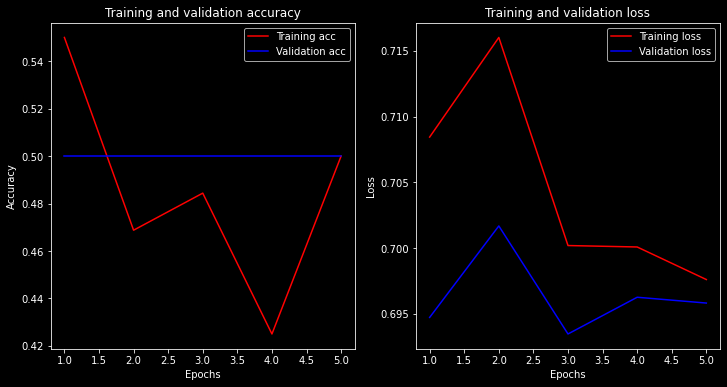

In [83]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training acc', color = 'red')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend()

# plt.figure()
plt.subplot(1,2,2)
plt.plot(epochs, loss, 'b', label='Training loss', color = 'red')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [111]:
file_name = os.path.join(cur_dir, 'Original_data/spiral/healthy/V01HE01.png')

In [114]:
from PIL import Image


# def load(filename):
#    np_image = Image.open(filename)
#    np_image = np.array(np_image).astype('float32')/255
#    np_image = np.expand_dims(np_image, axis=0)
#    return np_image

# img = load(file_name)
# print(img.shape)
name = os.path.join(cur_dir, 'Original_data/spiral/healthy/V01HE01.png')
img = Image.open(name)

img = tf.image.decode_png(img, channels=3)
img.set_shape([None, None, 3])
img = tensorflow.image.resize_images(img, (32, 32))
img = img.eval(session=sess) # convert to numpy array
img = np.expand_dims(img, 0) # make 'batch' of 1

pred = model.predict(img)
pred = labels["label_names"][np.argmax(pred)]
pred

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).

In [108]:
model.predict(img)

ValueError: in user code:

    File "/Users/mahimairaja/opt/anaconda3/envs/aiml/lib/python3.10/site-packages/keras/engine/training.py", line 1801, in predict_function  *
        return step_function(self, iterator)
    File "/Users/mahimairaja/opt/anaconda3/envs/aiml/lib/python3.10/site-packages/keras/engine/training.py", line 1790, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/mahimairaja/opt/anaconda3/envs/aiml/lib/python3.10/site-packages/keras/engine/training.py", line 1783, in run_step  **
        outputs = model.predict_step(data)
    File "/Users/mahimairaja/opt/anaconda3/envs/aiml/lib/python3.10/site-packages/keras/engine/training.py", line 1751, in predict_step
        return self(x, training=False)
    File "/Users/mahimairaja/opt/anaconda3/envs/aiml/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/mahimairaja/opt/anaconda3/envs/aiml/lib/python3.10/site-packages/keras/engine/input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 128, 128, 3), found shape=(32, 256, 3)
